# 1. Labeler backend manages your annoation project


Labeler backend service handles, stores, and manages the data and auxiliary information in your annotation project with simple interfaces in a single notebook.

So you don't need to juggle all the imports and exports, JSONs, and CSVs.

In [1]:
from labeler_ui import Authentication, Dashboard
from labeler_client import Service
import pandas as pd
token = #auth token 
demo = Service(project='demo',token=token)


labeler-ui: 1.2.1
labeler-client: 1.1.0


***

# 2.  Label without leaving the notebook

You do not need to leave a notebook and do exploration, pre-processing, labeling, analysis, or even model debugging.

Frictions of frequent tool switches and import/exports removed.



## 2.1 Convenient batch annotation spreadsheet-style 
Want to label in batches? No need to export and import in a Google Spreadsheet.

In [2]:
s1 = demo.search(keyword='', limit=10, start=0)
s1.show({'view':'table'})

show(7ff7fc549b20, self=<labeler_ui.widgets.Annotation.Annotation object at 0x7ff7f9f72f10>)

LayoutWidget(Layout(show(7ff7fc549b20, self=<labeler_ui.widgets.Annotation.Annotation object at 0x7ff7f9f72f10…

## 2.2 Zoom-in with single view for extraction tasks, etc.

In [20]:
s1 = demo.search(keyword='', limit=10, start=0)
s1.show({'view':'single'})

show(7fb11bfd3340, self=<labeler_ui.widgets.Annotation.Annotation object at 0x7fb11ac44fd0>)

LayoutWidget(Layout(show(7fb11bfd3340, self=<labeler_ui.widgets.Annotation.Annotation object at 0x7fb11ac44fd0…

***

# 3. Precisely directed labeling through subsets

* Not all data points are equally important to achieve your annotation goals like
 * reducing labeling costs,
 * shortening time to completion, or
 * improving label quality (regarding fairness, bias, coverage, etc.). 

*Subsets* precisely target the important data points for your goal.

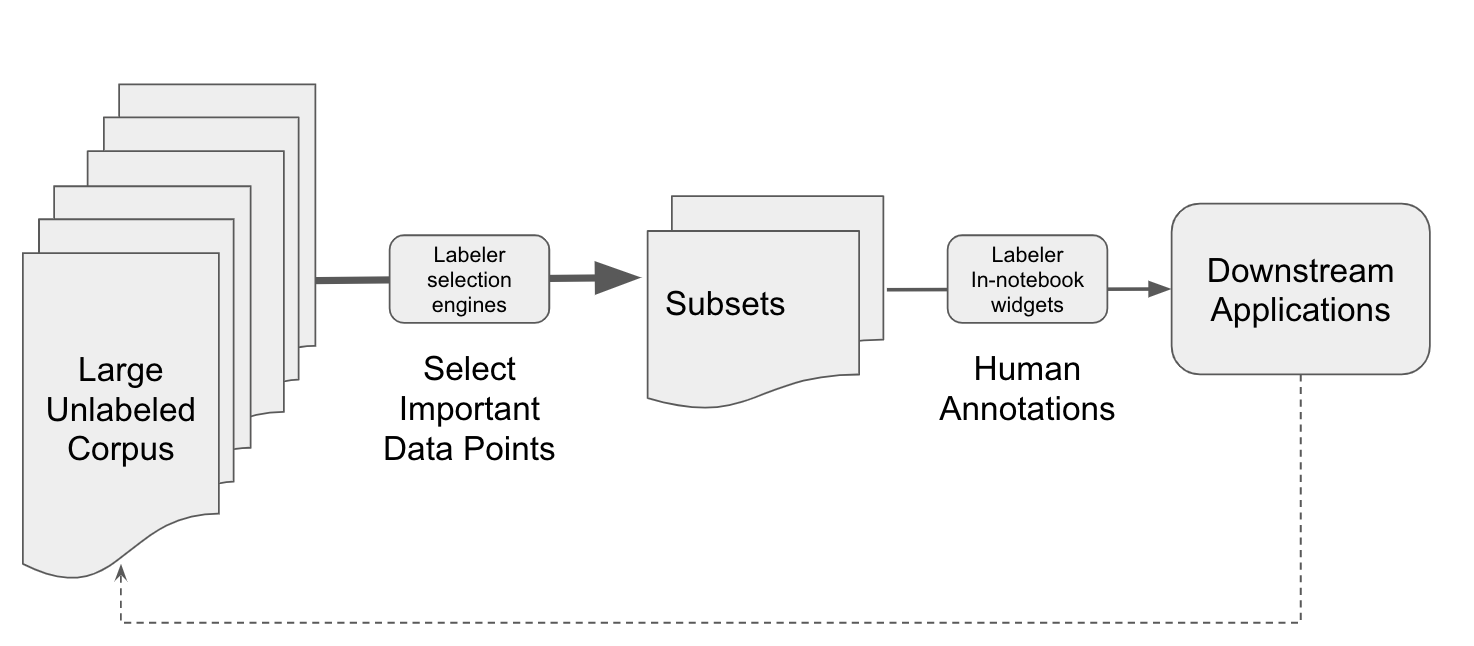
* Not all tools support precisely directly labeling to spend human power on important data effectively.

The subset is the object containing the selected data examples for further manipulation. It is a core concept of Labeler's programmatic interfaces.

* Labeler provides built-in subset selection engines

## 3.1 Heuristic-based searches
Direct your labeling to your need.

In [78]:
s2= demo.search(keyword='fail',
                  limit=50,
                  start=0)
s2.show({'view':'table'})

show(7ff5373d3220, self=<labeler_ui.widgets.Annotation.Annotation object at 0x7ff5373d7b80>)

LayoutWidget(Layout(show(7ff5373d3220, self=<labeler_ui.widgets.Annotation.Annotation object at 0x7ff5373d7b80…

In [50]:
s2_reg= demo.search(regex='*#delay*',
                  limit=50,
                  start=0)
s2_reg.show({'view':'table'})

show(7ff53581adc0, self=<labeler_ui.widgets.Annotation.Annotation object at 0x7ff53580deb0>)

LayoutWidget(Layout(show(7ff53581adc0, self=<labeler_ui.widgets.Annotation.Annotation object at 0x7ff53580deb0…

## 3.2 Automated suggestion

Sometimes heuristics do not work, or you run out of ideas. 

Try automated subset suggestions with ML techniques.

In [79]:
s4 = demo.search(keyword='delay', limit=3, start=0)
# try replacing the keyword here to test the similarity search 
s5 = s4.suggest_similar('bert-embedding', limit=4)# needs to provide a valid meta_name
s5.show()

show(7ff535960040, self=<labeler_ui.widgets.Annotation.Annotation object at 0x7ff5358b48b0>)

LayoutWidget(Layout(show(7ff535960040, self=<labeler_ui.widgets.Annotation.Annotation object at 0x7ff5358b48b0…

***

# 4. In-notebook analysis to aid decision making

In [5]:
#Analysis
from labeler_ui import Dashboard
dash_wg = Dashboard(demo)
#dash_wg.show({"height":500})
dash_wg.show()

show(7ff7fc589100, self=<labeler_ui.widgets.Dashboard.Dashboard object at 0x7ff7fc5959d0>)

LayoutWidget(Layout(show(7ff7fc589100, self=<labeler_ui.widgets.Dashboard.Dashboard object at 0x7ff7fc5959d0>)…

**Insight1**: unbalanced class labels-> **decision** collect more potentially positive and netural examples

In [2]:
# getting potential positive examples
s_pos = demo.search(keyword='happy', limit=10, start=0)
ss = s_pos.suggest_similar('bert-embedding', limit=4)# needs to provide a valid meta_name
ss.show()

show(7fb11ac38ac0, self=<labeler_ui.widgets.Annotation.Annotation object at 0x7fb118776190>)

LayoutWidget(Layout(show(7fb11ac38ac0, self=<labeler_ui.widgets.Annotation.Annotation object at 0x7fb118776190…

**Insight 2**: One of the annotators is "drunk"-> **decision** needs to have their data excluded from the training data

In [71]:
filtered_training_set = demo.export()[df_out['annotator']!='IAzgHOxyeLQBi5QVo7dQR0p2DpA2']
filtered_training_set

,data_id,content,annotator,label_name,label_value
0,567862940348579840,@united I've been doing this for 15 years and ...,00hUwRoyemQtnV7I91R2TpuIcsC3,sentiment,[neg]
1,567863197341847616,"@SouthwestAir Yeah, we figured it out. Thanks.",00hUwRoyemQtnV7I91R2TpuIcsC3,sentiment,[pos]
2,567863445422546880,@SouthwestAir On my flight today from RSW to G...,00hUwRoyemQtnV7I91R2TpuIcsC3,sentiment,[pos]
3,567871168214106112,@USAirways Your whole handling of this was a j...,00hUwRoyemQtnV7I91R2TpuIcsC3,sentiment,[neg]
4,567860325179072512,@SouthwestAir took our BOS to BWI plane for a ...,00hUwRoyemQtnV7I91R2TpuIcsC3,sentiment,[neg]
5,567861727833894912,@united mechanical issues causes delay and con...,00hUwRoyemQtnV7I91R2TpuIcsC3,sentiment,[neg]
6,567864523585118208,@USAirways delayed my flight 3 times before Ca...,00hUwRoyemQtnV7I91R2TpuIcsC3,sentiment,[neg]
107,567871270014025664,@SouthwestAir Why won't you let me leave Newark!?,00hUwRoyemQtnV7I91R2TpuIcsC3,sentiment,[neg]
108,567871439585435648,@united Hours on the phone...hung up on...all ...,00hUwRoyemQtnV7I91R2TpuIcsC3,sentiment,[neg]
109,567871780188061696,@united You allow shady 3rd party services to ...,00hUwRoyemQtnV7I91R2TpuIcsC3,sentiment,[neg]


***

# 5. Conveniently integrated active learning 

When you have a downstream application, let the models tell you the "important" data points they need labels on.

Easily incoporate Active Learning algorithms in your labeling project.


In [15]:
# load init and testing data
import modAL, sklearn, numpy as np
from labeler_client import subset
npzfile = np.load('tweet_init_test.npz')
X_init, y_init, X_test, y_test = npzfile['X_init'], npzfile['y_init'],  npzfile['X_test'], npzfile['y_test']
#initialize learner
acc_list = []
learner = modAL.models.ActiveLearner(
    estimator=sklearn.ensemble.RandomForestClassifier(),
    query_strategy=modAL.uncertainty.uncertainty_sampling,
    X_training=X_init, y_training=y_init
)

In [10]:
s_pool = demo.search(keyword='', meta_names=['bert-embedding'], limit=100, start=0)
uuid_pool,X_pool=[],[]
for item in s_pool.get_annotation_list():
    uuid_pool.append(item['uuid'])
    X_pool.append(item['metadata'][0]['value'])
# Active selection: let model select next batch
query_idx, query_inst = learner.query(X_pool,n_instances=3)
next_batch=subset.Subset(service=demo, data_uuids=list(np.array(uuid_pool)[query_idx]))
next_batch.show()# -> annotates in widget

show(7fb11bfd39a0, self=<labeler_ui.widgets.Annotation.Annotation object at 0x7fb11ac446a0>)

LayoutWidget(Layout(show(7fb11bfd39a0, self=<labeler_ui.widgets.Annotation.Annotation object at 0x7fb11ac446a0…

In [12]:
# get y_new
y_new = []
for item in next_batch.get_annotation_list():
    data_uuid = item['uuid']
    labels = item['annotation_list'][0]['labels_record']
    for l in labels:
        if l['label_name']=='sentiment':
            y_new.append(l['label_value'][0])
#remove from pool
X_pool,uuid_pool= np.delete(X_pool, query_idx, axis=0), np.delete(uuid_pool, query_idx, axis=0)

In [13]:
#update learner and compute accuracy
learner.teach(query_inst, np.array(y_new))
acc = learner.score(X_test, y_test)
acc_list.append(acc)


In [14]:
acc_list

[0.6573426573426573]

***

# Appendix

## A.1 Getting schema history and updating schema

In [38]:
demo.get_schemas().value()

[{'active': True,
  'created_on': 1675379283296,
  'schemas': {'label_schema': [{'level': 'record',
     'name': 'sentiment',
     'options': [{'text': 'positive', 'value': 'pos'},
      {'text': 'negative', 'value': 'neg'},
      {'text': 'neutral', 'value': 'neu'}]},
    {'level': 'span_ch',
     'name': 'sp',
     'options': [{'text': 'positive', 'value': 'pos'},
      {'text': 'negative', 'value': 'neg'}]}]},
  'uuid': '4ebdf2ec-ceda-413d-b40f-217e75a9c0c3'},
 {'active': False,
  'created_on': 1674507466564,
  'schemas': {'label_schema': [{'level': 'record',
     'name': 'sentiment',
     'options': [{'text': 'positive', 'value': 'pos'},
      {'text': 'negative', 'value': 'neg'}]}]},
  'uuid': 'd0ebe641-25bc-439d-b7a6-a114d8d64d34'},
 {'active': False,
  'created_on': 1670459477298,
  'schemas': {'label_schema': [{'level': 'record',
     'name': 'sentiment',
     'options': [{'text': 'positive', 'value': 'pos'},
      {'text': 'negative', 'value': 'neg'},
      {'text': 'neutral',

In [ ]:
demo.get_schemas().set_schemas({
    'label_schema': [
        {
            "name": "sentiment",
            "level": "record", 
            "options": [
                { "value": "pos", "text": "positive" },
                { "value": "neg", "text": "negative" },
                { "value": "neu", "text": "neutral" },
                { "value": "sar", "text": "sarcastic" },
                
            ]
        }
    ]
})

## A.2 Flexible Import and export of data

In [ ]:
#load data with metadata
df = pd.read_csv("tweets.csv").loc[:100]
sv.import_data_df(df, column_mapping={'id':'id',
                                      'content':'content',
                                      "metadata":'pseudo_label'})
s1= sv.search(keyword='',
                  limit=10,
                  start=0, 
                  meta_names=['pseudo_label'])
s1.show()

## A.3 Subset dispatch/assignment
Example: Assign susbset from "Insight 1" to a certain annotator.

In [3]:
s1.assign(annotator='00hUwRoyemQtnV7I91R2TpuIcsC3')

http://a74bd49f7393e513d.awsglobalaccelerator.com:5000/demo/assignment


{'uuid': '5117117b-d003-4622-bd30-8fb81d6bc19b'}

In [8]:
s_next = demo.get_assignment(latest_only=True)
s_next.show()

{'5280eb54-8aaf-4a84-8805-92381bdcb0a3', '110e6c59-8f70-4c70-9864-74230ff69410', 'd2d9a93f-38a3-4e49-983e-6fa4928139b2', '160c1bc5-4cb5-47eb-9c1f-ea779ec0d377', 'a9e679a5-48ae-40ee-b99a-edd124ca57a0', '1a3c95eb-4cd2-4284-9fbf-9390ad644c44', '5a5f6ce8-c058-421c-b0f8-743a212bd522', 'ee408271-df5d-435c-af25-72df58a21bfe', '5cecc44a-f153-4f7a-aecf-7aa1dd50c3ca', '86fa8669-9f99-4db5-9ff4-5c2441fb179c'}


show(7ff7fc5f7c40, self=<labeler_ui.widgets.Annotation.Annotation object at 0x7ff7fc52afa0>)

LayoutWidget(Layout(show(7ff7fc5f7c40, self=<labeler_ui.widgets.Annotation.Annotation object at 0x7ff7fc52afa0…

In [4]:
# retrieve assigment
# default to own assignment
s_next = demo.get_assignment(annotator='00hUwRoyemQtnV7I91R2TpuIcsC3') 
s_next.show()# annotate in widget.

{'5280eb54-8aaf-4a84-8805-92381bdcb0a3', '110e6c59-8f70-4c70-9864-74230ff69410', 'd2d9a93f-38a3-4e49-983e-6fa4928139b2', '160c1bc5-4cb5-47eb-9c1f-ea779ec0d377', 'a9e679a5-48ae-40ee-b99a-edd124ca57a0', '1a3c95eb-4cd2-4284-9fbf-9390ad644c44', '5a5f6ce8-c058-421c-b0f8-743a212bd522', 'ee408271-df5d-435c-af25-72df58a21bfe', '5cecc44a-f153-4f7a-aecf-7aa1dd50c3ca', '86fa8669-9f99-4db5-9ff4-5c2441fb179c'}


show(7ff7fc5499a0, self=<labeler_ui.widgets.Annotation.Annotation object at 0x7ff7f9fb68e0>)

LayoutWidget(Layout(show(7ff7fc5499a0, self=<labeler_ui.widgets.Annotation.Annotation object at 0x7ff7f9fb68e0…